## Udacity Data Analysis Nanodegree project : Wrangle and Analyze Data


## Introduction to the analysis :

We will wrangle a dataset which is a tweet archive of Twitter user '@dog_rates', also known as 'WeRateDogs'. 'WeRateDogs' is a Twitter account that rates people's dogs with a funny comment about the dog. These ratings commonly have a denominator of 10. WeRateDogs has over 4 million followers and has received international media coverage.


## Purpose of this analysis


The goal is to create interesting analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required.

## The Data

- Enhanced Twitter Archive:

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything.


-  Image Predictions File:

Every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
the dataset is existed online and i'm going to use request library in python to access it.
also i get the url for the data by the udacity nanodegree.


- Additional Data via the Twitter API:

Back to the basicness of Twitter archives: retweet count and favorite count are two of the notable columns. Fortunately, this additional data can be gathered by anyone from Twitter's API.

In [94]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests 
import tweepy 
from tweepy import OAuthHandler
import json
import os
import csv
import sys
import time
from timeit import default_timer as timer

## Gathering the Data


In [95]:
# 1.0 Gathering the twitter archive dataset
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [96]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [97]:
# 2.0 Gathering image predictions file
df_predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')

In [98]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [99]:
# 3.0 Download Tweet JSON Data
#from tweepy import OAuthHandler
#from timeit import default_timer as timer

In [100]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

In [101]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
 #   # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
  #  for tweet_id in tweet_ids:
   #     count += 1
    #    print(str(count) + ": " + str(tweet_id))
     #   try:
      #      tweet = api.get_status(tweet_id, tweet_mode='extended')
       #     print("Success")
        #    json.dump(tweet._json, outfile)
         #   outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [102]:
# Read the saved tweet_json.txt file into a dataframe
with open('tweet_json.txt') as json_f:
    tweets_info = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for info in json_f:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        tweets_info = tweets_info.append(data,ignore_index=True)
tweets_info.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing the Data

In [103]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [104]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [105]:
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null object
retweets     2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [106]:
tweets_info.describe()

,tweet_id,favorites,retweets
count,2354,2354,2354
unique,2354,2007,1724
top,667495797102141441,0,3652
freq,1,179,5


In [107]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [108]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [109]:
all_columns = pd.Series(list(df_twitter_archive) + list(df_predictions) + list(tweets_info))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [110]:
df_twitter_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1239,712092745624633345,NaN,NaN,2016-03-22 01:45:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He's inverted af. Also very he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712092745...,7,10,Steven,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
980,749774190421639168,NaN,NaN,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,None,None,None,None
1790,677530072887205888,NaN,NaN,2015-12-17 16:45:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Axel. He's a Black Chevy Pinot on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677530072...,9,10,Axel,None,None,None,None
731,781655249211752448,NaN,NaN,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,NaN,NaN,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo,None,None,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
174,858107933456039936,NaN,NaN,2017-04-28 23:57:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,None,None,None,None
2008,672256522047614977,NaN,NaN,2015-12-03 03:30:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Mighty rare dogs here. Long smooth necks. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672256522...,8,10,None,None,None,None,None
1522,690649993829576704,NaN,NaN,2016-01-22 21:39:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None


In [111]:
df_twitter_archive.tweet_id.duplicated().sum()

0

In [112]:
df_twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [113]:
sum(df_twitter_archive.rating_numerator.isnull())

0

In [114]:
sum(df_twitter_archive.rating_denominator.isnull())

0

In [115]:
df_twitter_archive.query('rating_numerator ==1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [116]:
df_twitter_archive.query('rating_denominator <10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


## Quality:

*Twitter-archive table:*

- None values in name of dogs and incorrect dogs name like: "a", "an", "such","the", "very"...
- tweet_ id should convert to str.
- Useless columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,retweeted_status_timestamp should be removed.
- The timestamp should convert to timestamp datatype.
- There is no particular limit or specific numeric values of rating denominator such as 0, 2,7,...
- rating_numerator and rating_denominator should convert to float.


*image_predictions table:*

- tweet_id should convert to str
- tweets_info table:
- Favourite and retweets columns should convert to int datatype.


## Tidiness:

- We have 3 datasets, twitter_archive , image_predictions, and tweets_json dataset, we should merge them in one data frame.
    - We have three separate columns of dog categories.

## Clean:

**Define:**

convert tweet_id, retweets, and favorites in (tweet_info) table to int datatype

**Code:**

In [117]:
tweets_info['tweet_id'] = tweets_info['tweet_id'].apply(pd.to_numeric, errors='coerce')
tweets_info['favorites'] = tweets_info['favorites'].apply(pd.to_numeric, errors='coerce')
tweets_info['retweets'] = tweets_info['retweets'].apply(pd.to_numeric, errors='coerce')

**Test:**

In [118]:
tweets_info.dtypes

tweet_id     int64
favorites    int64
retweets     int64
dtype: object

**Tidiness:**

**Define:**

- Merge all three datasets to one dataset, and change datatype of tweet_id, in (twitter_archive_clean and image_predictions_clean.tweet_id) tables:

**Code:**

In [119]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_predictions_clean = df_predictions.copy()
tweets_info_clean = tweets_info.copy()

In [120]:
#merge all datasets tables in one dataset
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, tweets_info_clean, on = 'tweet_id', how = 'inner')
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_predictions_clean, on = 'tweet_id', how = 'inner')

In [121]:
#change tweet_id datatype
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype(str)
df_predictions_clean.tweet_id = df_predictions_clean.tweet_id.astype(str)

**Test:**

In [122]:
df_twitter_archive_clean[df_twitter_archive_clean.duplicated(['tweet_id'], keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Define:**

- After merging all datasets, we will check for duplicated 'tweet_id'

- Remove duplicated rows

**Code:**

In [123]:
df_twitter_archive_clean.drop([362], inplace=True)
df_twitter_archive_clean.drop([459], inplace=True)
df_twitter_archive_clean.drop([561], inplace=True)
df_twitter_archive_clean.drop([718], inplace=True)

**Test:**

In [124]:
df_twitter_archive_clean[df_twitter_archive_clean.duplicated(['tweet_id'], keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Define:**

- Change datatype of timestamp from str to datetime.

- Convet datatype of rating_numerator rating_denominator to float.

**Code:**

In [125]:
#converttimestamp to timestamp datatype , convert  datatype of rating_numerator and denominator to float
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])
df_twitter_archive_clean.rating_numerator = df_twitter_archive_clean.rating_numerator.astype('float')
df_twitter_archive_clean.rating_denominator = df_twitter_archive_clean.rating_denominator.astype('float')

**Test:**

In [126]:
#check datatype of retweeted_status_timestamp
df_twitter_archive_clean.iloc[0,3],type(df_twitter_archive_clean.iloc[0,3])

(Timestamp('2017-08-01 16:23:56'), pandas._libs.tslibs.timestamps.Timestamp)

In [127]:
type(twitter_archive_clean.iloc[0,10])
type(twitter_archive_clean.iloc[0,11])

numpy.int64

**Define:**

- Remove useless columns such as retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp

**Code:**

In [128]:
#drop useless columns
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

**Test:**

In [129]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              2069 non-null object
timestamp             2069 non-null datetime64[ns]
source                2069 non-null object
text                  2069 non-null object
expanded_urls         2069 non-null object
rating_numerator      2069 non-null float64
rating_denominator    2069 non-null float64
name                  2069 non-null object
doggo                 2069 non-null object
floofer               2069 non-null object
pupper                2069 non-null object
puppo                 2069 non-null object
favorites             2069 non-null int64
retweets              2069 non-null int64
jpg_url               2069 non-null object
img_num               2069 non-null int64
p1                    2069 non-null object
p1_conf               2069 non-null float64
p1_dog                2069 non-null bool
p2                    2069 non-null object
p2_conf               2069 

**Define:**

- Check for incorrect dog names, and make it as Nan then put it as "None" rows.

**Code:**

In [130]:
df_twitter_archive_clean.name.sort_values()

847             Abby
836             Abby
768              Ace
1656            Acro
1109           Adele
1657           Aiden
66               Aja
383            Akumi
663               Al
711           Albert
1676          Albert
120            Albus
328            Albus
919          Aldrick
1767       Alejandro
298        Alexander
991     Alexanderson
388              Alf
1364           Alfie
291            Alfie
695            Alfie
1956           Alfie
532            Alfie
46              Alfy
161            Alice
1441           Alice
1259           Amber
1116         Ambrose
1799             Amy
1914          Amélie
            ...     
665             just
1227            just
1741            just
871             just
1723           light
690               my
810              not
1484      officially
1659             one
293              one
815              one
755              one
155            quite
2043           quite
141            quite
1752           space
21           

In [131]:
#check for unclear dog names
df_twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Da

In [132]:
#replace incorrect name with NaN
df_twitter_archive_clean.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly', 'not', '0', 'life', 'one', 'his', 'very'],np.NaN, inplace =True)

In [133]:
#put all NaN values in "None"
df_twitter_archive_clean['name'].fillna(value="None", inplace=True)

**Test:*

In [134]:
df_twitter_archive_clean.name.value_counts()

None        673
Charlie      11
Oliver       10
Tucker       10
Penny        10
Lucy         10
Cooper       10
Winston       8
Sadie         8
Lola          8
Bo            8
Toby          7
Daisy         7
Stanley       6
Bailey        6
Bella         6
Jax           6
Scout         6
Milo          6
Dave          6
Rusty         6
Koda          6
Louis         5
Buddy         5
Alfie         5
Oscar         5
Leo           5
Larry         5
Chester       5
Dexter        4
           ... 
General       1
Newt          1
Toffee        1
Birf          1
Marq          1
Hermione      1
Rocco         1
Terrenth      1
Murphy        1
Lilah         1
Obie          1
Apollo        1
Baron         1
Torque        1
Miguel        1
Pippin        1
Horace        1
Luther        1
Wesley        1
Meatball      1
Asher         1
Nugget        1
Darby         1
Comet         1
Napolean      1
Kara          1
Gert          1
Walker        1
Goliath       1
Striker       1
Name: name, Length: 914,

In [135]:
df_twitter_archive_clean.rating_denominator.describe()

count    2069.000000
mean       10.512808
std         7.187423
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

**Define:**


After checking of rating_denominator, we found that there is no based of specific value or limit of denomirator, and after using describe function we found that mean ,first, second and third quartiles are equals 10 value, we will remove that rating_denominator which are less than 10.

In [136]:
#check rate that is not 10 
rating_denominator_not_equal_10 = df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator']< 10]

In [137]:
rating_denominator_not_equal_10

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
415,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
2052,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,None,None,None,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


**Code:**

In [138]:
#we want to make one based rating_denominator which is 10
#inappropriate_values =[7.0,2.0]   
 

#for values in twitter_archive_clean.rating_denominator:
    #if values in inappropriate_values:
        #twitter_archive_clean.rating_denominator[twitter_archive_clean.rating_denominator == values] = 10.0

In [139]:
df_twitter_archive_clean.drop([415], inplace=True)
df_twitter_archive_clean.drop([2052], inplace=True)

**Test:**

In [140]:
df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator']==7.0]
df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator']==2.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [141]:
df_twitter_archive_clean.rating_denominator.value_counts()

10.0     2051
50.0        3
80.0        2
11.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
20.0        1
Name: rating_denominator, dtype: int64

**Define:**


- We want to merge dog types into one column.

**Code:**

In [142]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              2067 non-null object
timestamp             2067 non-null datetime64[ns]
source                2067 non-null object
text                  2067 non-null object
expanded_urls         2067 non-null object
rating_numerator      2067 non-null float64
rating_denominator    2067 non-null float64
name                  2067 non-null object
doggo                 2067 non-null object
floofer               2067 non-null object
pupper                2067 non-null object
puppo                 2067 non-null object
favorites             2067 non-null int64
retweets              2067 non-null int64
jpg_url               2067 non-null object
img_num               2067 non-null int64
p1                    2067 non-null object
p1_conf               2067 non-null float64
p1_dog                2067 non-null bool
p2                    2067 non-null object
p2_conf               2067 

In [143]:
df_twitter_archive_clean = pd.melt(df_twitter_archive_clean,
                        id_vars=['tweet_id','timestamp', 'source', 'text','expanded_urls', 'rating_numerator', 'rating_denominator', 'name','favorites', 'retweets', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'], value_name='dog_types')
df_twitter_archive_clean = df_twitter_archive_clean.drop('variable', axis=1)

**Test:**

In [144]:
#null values in each column 
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8268 entries, 0 to 8267
Data columns (total 22 columns):
tweet_id              8268 non-null object
timestamp             8268 non-null datetime64[ns]
source                8268 non-null object
text                  8268 non-null object
expanded_urls         8268 non-null object
rating_numerator      8268 non-null float64
rating_denominator    8268 non-null float64
name                  8268 non-null object
favorites             8268 non-null int64
retweets              8268 non-null int64
jpg_url               8268 non-null object
img_num               8268 non-null int64
p1                    8268 non-null object
p1_conf               8268 non-null float64
p1_dog                8268 non-null bool
p2                    8268 non-null object
p2_conf               8268 non-null float64
p2_dog                8268 non-null bool
p3                    8268 non-null object
p3_conf               8268 non-null float64
p3_dog                8268 

In [145]:
import seaborn as sns    
%matplotlib inline
plt.rcParams['figure.figsize']=(12,13)

## Visualization:


After finishing the wrangling part which is encompass gathering, assessing, and cleaning the given data, here we want to answer some questions by using visualizing.


We used some attributes after we had gathered, assessed, and cleaned our data, such as, retweets rate, favourites rates, dog categories and dog names.

In [146]:
df_twitter_archive_clean.drop(df_twitter_archive_clean.query('(dog_types == "None")').index ,inplace=True)

**Find out the dog category with the highest favourites' rate**


In this first part, we want to find out the category which is recorded the highest rate of favourites, after removing None values, and visualizing the chart, we can say that puppo dog recorded the highest rate, then doggo, floofer, and pupper.

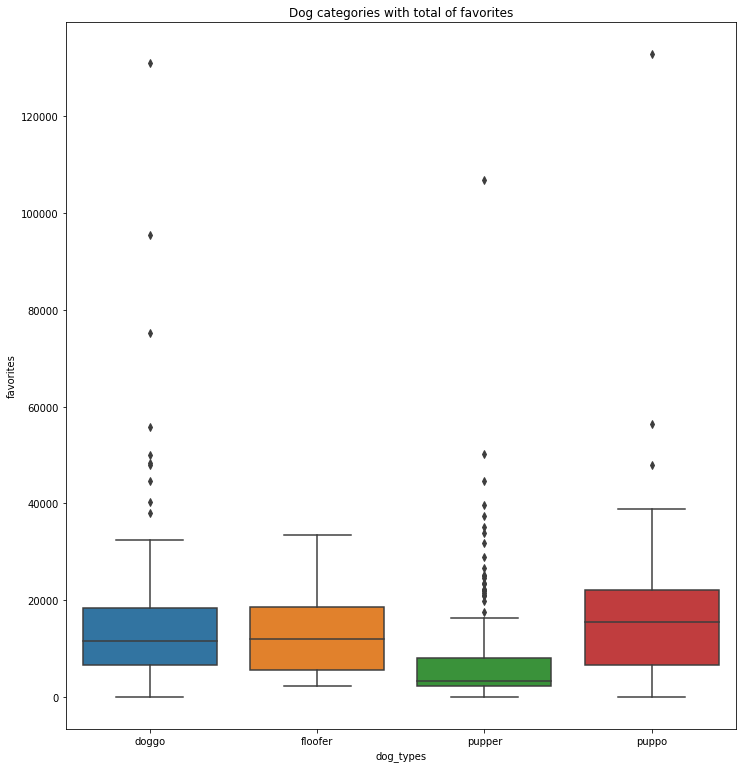

In [147]:
sns.boxplot(x="dog_types", y="favorites", data=df_twitter_archive_clean).set_title('Dog categories with total of favorites');

In [148]:
#calculate rating ration
df_twitter_archive_clean['rating_ratio'] = df_twitter_archive_clean['rating_numerator']/df_twitter_archive_clean['rating_denominator']

**Discover the ratio of dog rating distribution**


Hereafter we calculated the ratio of dog rating from(rating numerator/rating denominator) the rate, we can see that the chart takes normally distribution of dogs rating.

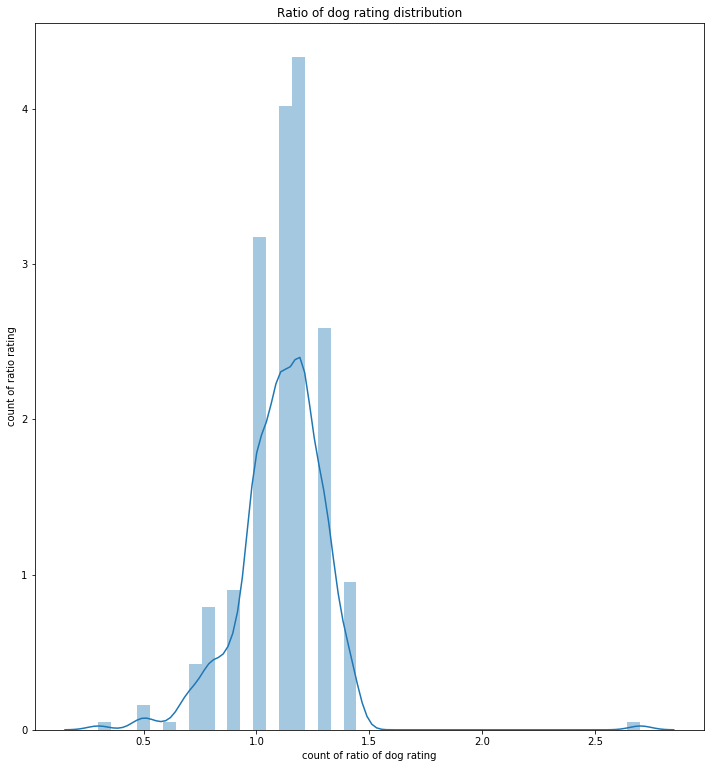

In [149]:
sns.distplot(df_twitter_archive_clean.rating_ratio).set_title('Ratio of dog rating distribution');
plt.xlabel('count of ratio of dog rating')
plt.ylabel('count of ratio rating')
plt.show();

**Find the top 60 dog names with retweets rate**

In the last part, after removed None values, and removed inappropriate dog names such as ("a", "an", "the", "very", "quite",... we want to find out the top 60 of dog names which are recorded the highest retweets rating.

As we can see from the chart the name of the dog ("Bo") recorded the highest rate of retweets, then the name of the dog "Jamesy."

In [150]:
df_twitter_archive_clean.drop(df_twitter_archive_clean.query('(name == "None")').index ,inplace=True)

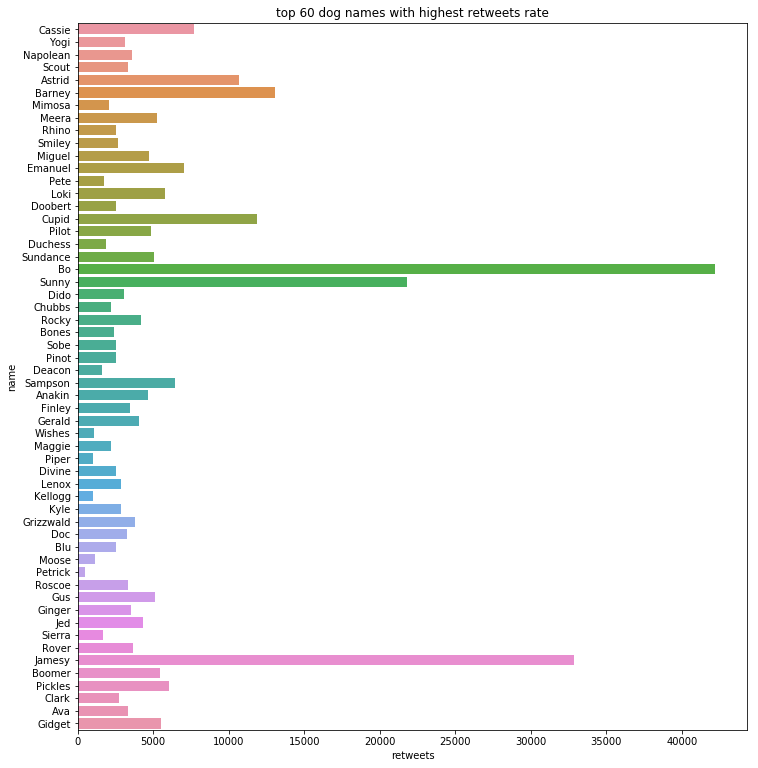

In [151]:
sns.barplot(y="name", x="retweets", data = df_twitter_archive_clean[0:60]).set_title('top 60 dog names with highest retweets rate');

In [154]:
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)